# Projet SD201 Lauryne

## 1) Importations 

In [220]:
import pandas as pd
from scipy import stats
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pylab import *
import random as rd

## 2) Database

In [219]:
file = pd.read_csv("us_disaster_declarations.csv")
file.columns

Index(['fema_declaration_string', 'disaster_number', 'state',
       'declaration_type', 'declaration_date', 'fy_declared', 'incident_type',
       'declaration_title', 'ih_program_declared', 'ia_program_declared',
       'pa_program_declared', 'hm_program_declared', 'incident_begin_date',
       'incident_end_date', 'disaster_closeout_date', 'fips', 'place_code',
       'designated_area', 'declaration_request_number', 'last_ia_filing_date',
       'hash', 'id', 'last_refresh'],
      dtype='object')

## 3) Breakdown of disasters by state

In [288]:
result = file.groupby(by=['state'], as_index=False).agg({'disaster_number': pd.Series.nunique})

#The disasters are studied over 70 years 
result.disaster_number/=70

### Bar chart of average number of disasters by state per year

<BarContainer object of 59 artists>

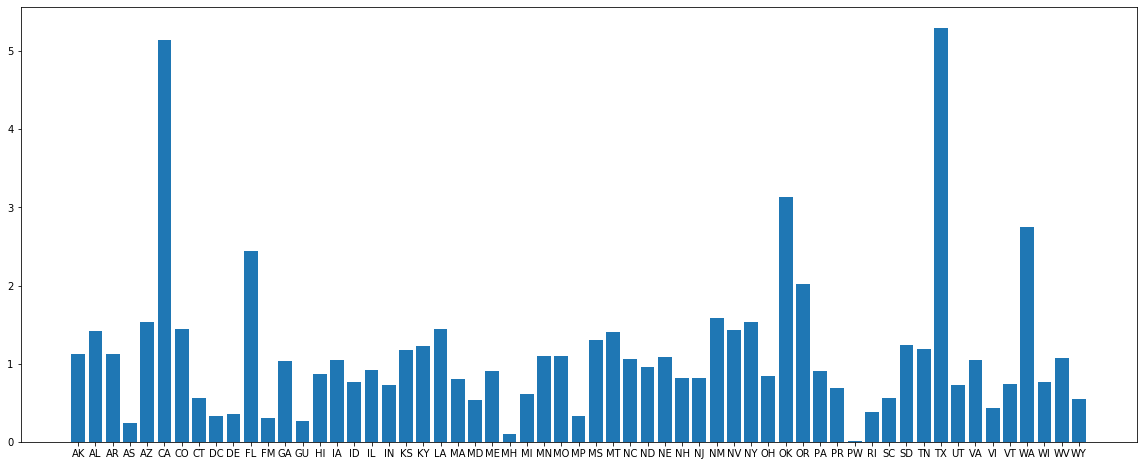

In [289]:
figure(figsize=(20,8))
plt.bar(result['state'],result['disaster_number'])

<p> As explained above, a disaster that has affected several counties of the same state appears several times in the database (once for each affected county). Here, the aggregation makes it possible to count only once a disaster having affected a state, even if this one took place in many counties. After removing these duplicates, the database is only 4708 rows long.  </p>
    
#### Analyse 

<p> List of the biggest states of the USA : Alaska (AK) , Texas (TX), Californie (CA), Montana (MT), Nouveau-Mexique (NM), Arizona (AZ), Nevada (NV), Colorado (CO), Oregon (OR), Wyoming (WY) </p>
<p> The most affected states here are Californie (CA), Texas (TX), Oklahoma (OK), Washington (WA), Floride (FL)and Oregon (OR). <b> Therefore they are the states which need the largest number of relief forces.</b>
<p> We can see that the states of Texas and California are the most affected by disasters. This is to be nuanced with their size since they are also the two biggest states of the country. For example we can give some values of the number of disasters by state per km2 (multiplied by 10^6 for readability). Let's call it the index of the state : Texas = 7.6; California = 12; Oklahoma = 17 ; Washington = 14.8 ; Floride = 14; Oregon = 7.9 ; </p>
<p> Taking the area into account, one can realize that Oklahoma is ultimately more vulnerable than Texas and California. Conversely, the indicator for Alaska, which has a very large area, is worth 0.66. So it's a pretty safe state. </p>
Let's take a look at this index for the rest of the territories.


In [57]:
area = [1717854, 135765, 137732, 199, 295254, 423970, 269601, 14357, 185, 6447, 170304,1000000,153909, 
549, 28311, 145743, 216446, 149998, 94321, 213096, 104659, 134264, 27336, 32133, 91646, 181 , 250494, 
225171, 180533, 477, 125434,380834,139389, 183112, 200345, 24216, 22588, 314915, 286351, 
141299, 116096, 181035,254805, 119283, 9104, 1000000, 4002, 82932, 199731, 109151, 696621, 
219887,110785, 352, 24901, 184665, 169639, 62755, 253336 ]

It is possible to see that there are only 50 states in the USA but that there are 59 here. In these 59, there are territories belonging to the USA which are not states but there are also former American territories. Indeed, the database has entries dating back to 1953. We have decided to keep these territories, their presence not being decisive.
<p> However, most being islands, their area is very small compared to that of the states. For territories being affected by approximately the same number of disasters per year, say one per year, those which are islands will have a very high index because of their small area compared to other states.This does not necessarily indicate a greater vulnerability. Therefore I decide to consider only the 50 traditional states. Also, I couldn't find out which territory the abbreviations FM and PW refer to, so I'm excluding them from the follow-up. <p> 
<p> => Extra territories :  AS, DC, FM, GU, MH, MP, PR, PW, VI <p>

In [50]:
#Indexes of the "states" we don't considerate
ind=[3, 8, 11, 13, 25, 29, 44, 45, 53]

result_bis=[]
count=[]
for i in range (59):
    if i not in ind :
        result_bis.append(result.state[i])
        count.append(result.disaster_number[i]/area[i]*1000000)

### Bar chart of average number of disasters*10^6 in the 50 states per km2 per year

<BarContainer object of 50 artists>

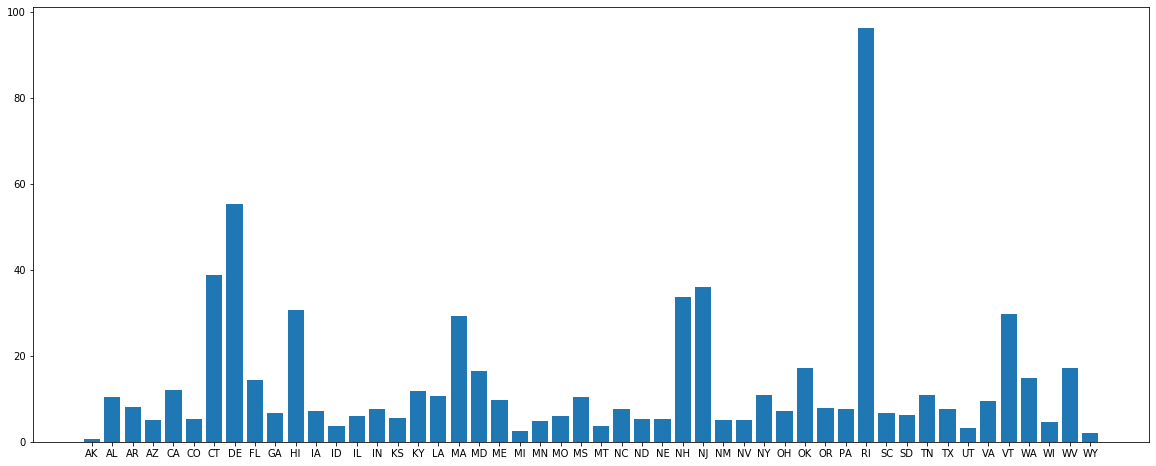

In [51]:
figure(figsize=(20,8))
plt.bar(result_bis,count)

#### Analyse

This graph confirms the observation made previously on Texas and California. These states are more prone to disasters due to their size. The most vulnerable states here are Rhode Island by far then Delaware and Connecticut. 
<p> This information is interesting to know but does not fundamentally change the previous conclusions. Indeed, our goal and to distribute the relief forces in an optimal way. Thus, the larger and more populated a territory, the greater the disasters that affect it and the more people will need to be saved and therefore the more manpower it will need to manage them. </p>
<p> Now we can look in more detail at the types of first aiders needed by looking at the types of disasters affecting each state. </p>

In [290]:
#List of all different types of disasters 
incident=file.drop_duplicates('incident_type')
types=incident.incident_type

#Dataset "file" but without counting with multiplicity the disasters having affected many counties of a state 
df=file.drop_duplicates('disaster_number')

result2 = df.groupby(by=['state','incident_type']).count().unstack(fill_value=0).stack()

pandas.core.series.Series

### Cumulative bar chart of disaster types by state from 1953 to 2022

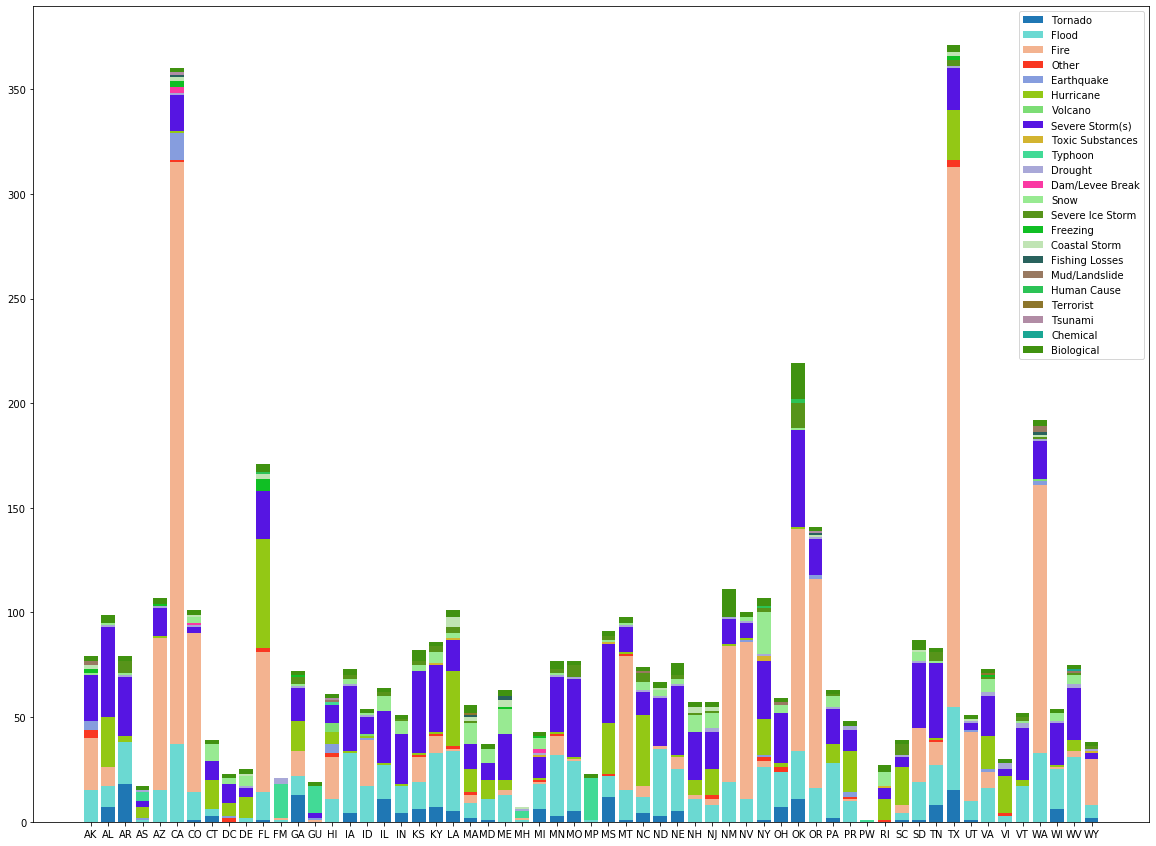

In [279]:
fig, ax = plt.subplots(figsize=(20,15))
ax.bar(result['state'],result2.disaster_number[result2.index.get_level_values("incident_type")==types.values[0]], label='Tornado')
y=result2.disaster_number[result2.index.get_level_values("incident_type")==types.values[0]].values

for i in range(1,23):
    ax.bar(result['state'],result2.disaster_number[result2.index.get_level_values("incident_type")==types.values[i]], bottom=y, label=types.values[i], color=(rd.random(),rd.random(),rd.random()))
    y=y+result2.disaster_number[result2.index.get_level_values("incident_type")==types.values[i]].values

plt.legend()

#### Analyse


The observation of this graph allows us to draw several conclusions. 
<p> First, fires are the most frequent type of disaster, followed by severe storms, floods and hurricanes. It is therefore important that the United States has well-established responses to this type of disaster and enough trained people.</p> 
<p> We can also adapt the answers in a way specific to each state. For example, Los Angeles and Florida are very hurricane prone while Texas is not at all. Some states have a very varied geography and are therefore affected by all types of disasters such as California. </p>

As we've seen, fires are the most common type of disaster. Given that the stopping of a fire requires the direct intervention of the rescue forces, we propose to study the duration of this type of disaster in particular in the following. Indeed, this will give us information on the effectiveness of the interventions.

##  4) Duration of disasters

For the study of the average duration of disasters I considered many times the disasters that have affected several counties of the same state because the duration may vary depending on the location.


In [296]:
#Deletion of lines where information is missing 
bis=file.dropna(subset=['incident_end_date','incident_begin_date']) 

#Calcul of disasters duration
duree=pd.DatetimeIndex(bis['incident_end_date'])-pd.DatetimeIndex(bis['incident_begin_date'])

#Creation of a dataframe with the years of the incidents, their duration and their type
df = pd.DataFrame({'year': pd.DatetimeIndex(bis['incident_begin_date']).year, 'duration': duree.days, 'incident_type' : bis.incident_type})

### Graph of the evolution of the average duration of disasters in days in the USA over the years

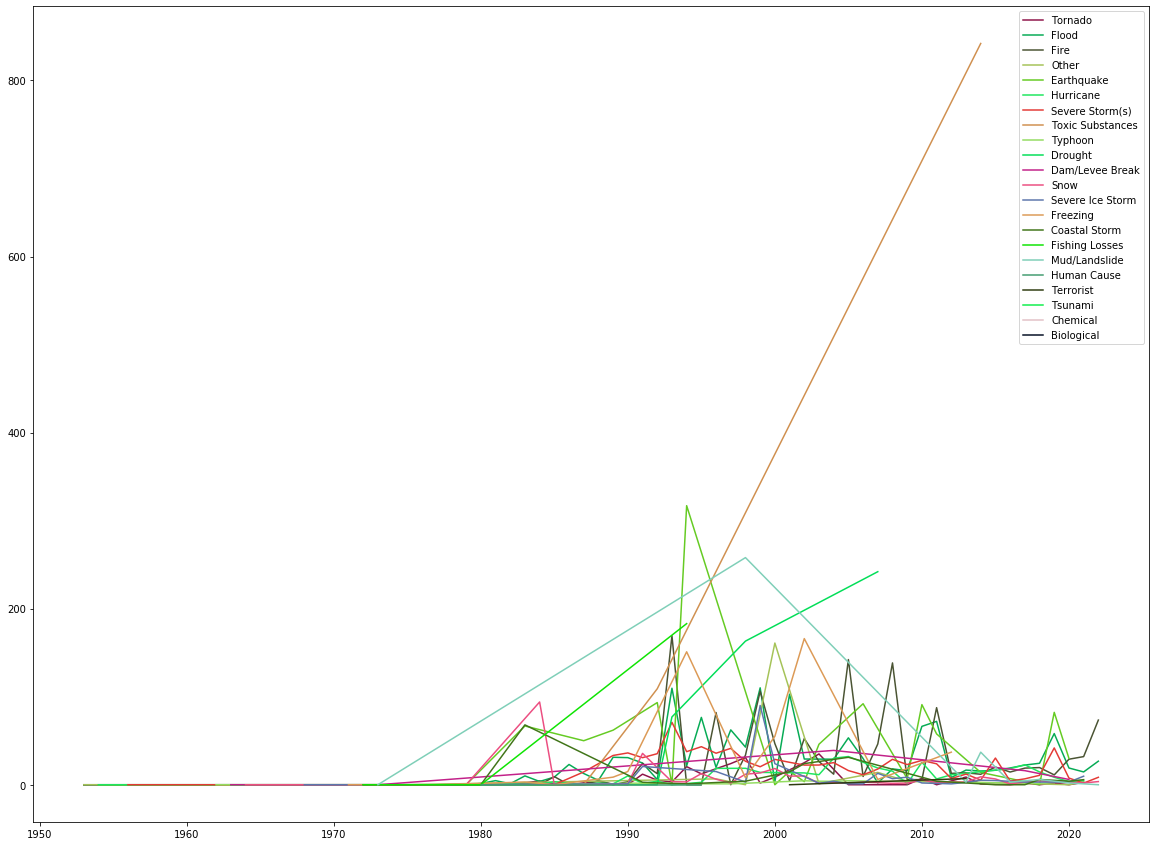

In [285]:
fig, ax = plt.subplots(figsize=(20,15))


for i in range(23):
    if(i!=6):  #volcano not taken into account, one of the events lasted more than 5000 days which would make the graph really unreadable
        result3 = df[df.incident_type==types.values[i]].groupby(by=['year']).mean()
        ax.plot(result3,label=types.values[i],color=(rd.random(),rd.random(),rd.random()))
       
    
plt.legend()

We get something not very readable.
<p> But overall we see that there was an explosion in the duration of all disasters in the 1970s. It may be due to an anomaly in the database or it brings us back to the manifestations of global warming studied elsewhere. </p>

### Evolution of the average duration of fires in days in the USA from 1953 to 2022

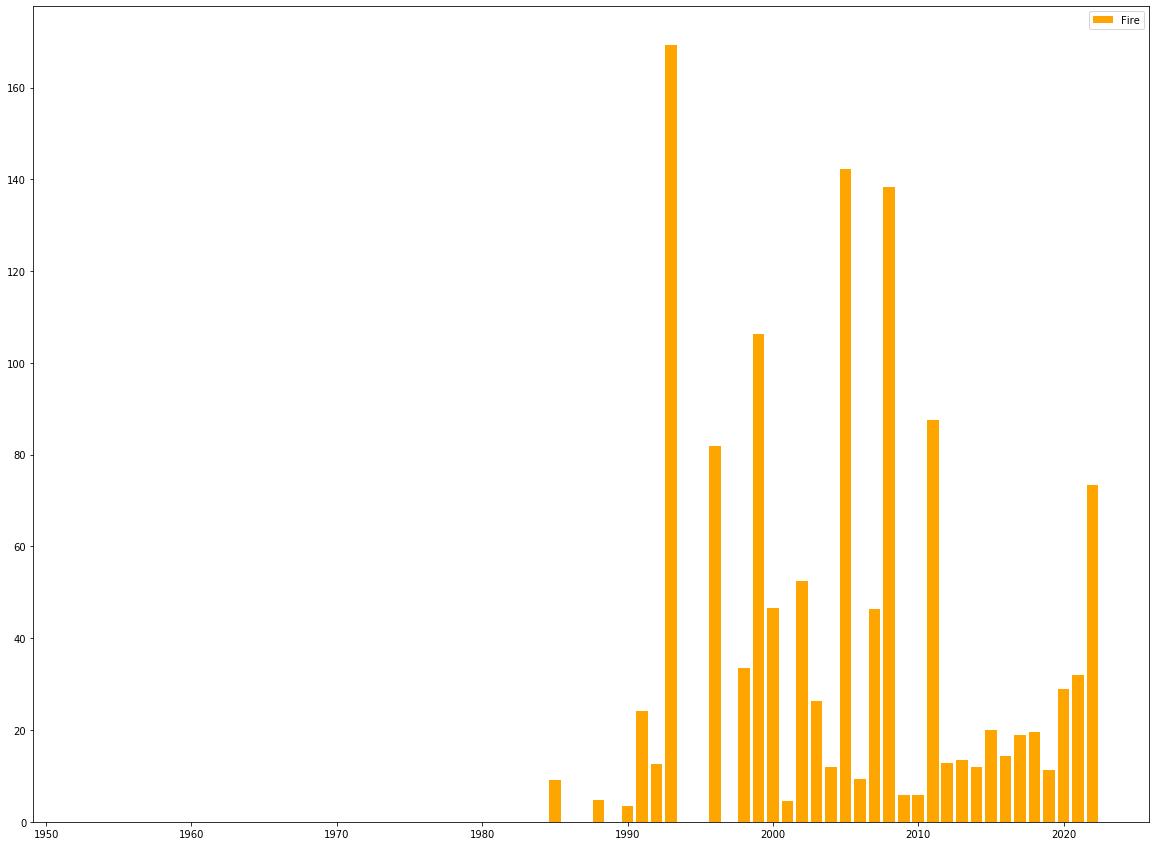

In [298]:
result3 = df[df.incident_type==types.values[2]].groupby(by=['year']).mean()

figure(figsize=(20,15))
plt.bar(result3.index,result3.duration, color='orange',label='Fire')

plt.legend()

#### Analyse 
After a lowering in the average duration of fires around 2010, it is again increasing with an average of 80 days for the year 2022. As heat waves increase in summer, we can predict an intensification and multiplication of fires, especially in summer. It would be necessary to strengthen the relief forces for this type of disaster by concentrating on arid regions such as California.


## 5) Classification 

I have a state and a date (month+day), can I predict the type of incident that is most likely to happen?

In [299]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [335]:
#Mettre les attributs sous forme numérique 

D1 = {'AK' :0, 'AL':1,  'AR':2, 'AS':3 , 'AZ':4, 'CA':5, 'CO':6, 'CT':7, 'DC':8,  'DE':9,  'FL':10, 'FM':11, 'GA':12, 
'GU':13,  'HI':14,'IA':15, 'ID': 16, 'IL' : 17,  'IN':18, 'KS':19, 'KY':20, 'LA':21, 'MA':22, 'MD':23, 'ME':24, 
'MH':25, 'MI':26, 'MN':27, 'MO':28, 'MP':29, 'MS':30,'MT':31, 'NC':32, 'ND':33, 'NE':34, 'NH':35, 'NJ':36, 'NM':37,
'NV':38, 'NY':39, 'OH':40, 'OK':41, 'OR':42, 'PA':43, 'PR':44, 'PW':45, 'RI':46, 'SC':47,  'SD':48, 'TN':49,'TX':50,
'UT':51, 'VA':52, 'VI':53, 'VT':54, 'WA':55, 'WI':56,  'WV':57, 'WY':58}

D2 = { 'Tornado' : 0, 'Flood' : 1, 'Fire':2, 'Other':3, 'Earthquake':4, 'Hurricane':5, 'Volcano':6,
'Severe Storm(s)':7, 'Toxic Substances':8, 'Typhoon':9, 'Drought':10, 'Dam/Levee Break':11, 'Snow':12,
'Severe Ice Storm':13, 'Freezing':14, 'Coastal Storm':15, 'Fishing Losses':16, 'Mud/Landslide':17, 'Human Cause':18,
'Terrorist':19, 'Tsunami':20, 'Chemical':21, 'Biological':22}


#Fonction de normalisation
def normalize(data):
    return (data - data.min()) / (data.max() - data.min()) 


In [340]:
bis = file.drop_duplicates('disaster_number')

state=[]
start=[]
disasters=[]
df=pd.DataFrame(columns=['state','start'])
df2=pd.DataFrame(columns=['disasters'])

for i in bis.index:
    
    state.append(D1[bis.state[i]])

    mois=bis.incident_begin_date[i][5:7]
    jour=bis.incident_begin_date[i][8:10]
    start.append(int(mois+jour))
    
    disasters.append(D2[bis.incident_type[i]])
 

df.state=state
df.start=start
df2.disasters= disasters 

df.state=normalize(df.state)
df.start=normalize(df.start)
#df2.disasters=normalize(df2.disasters)

In [344]:
# Assign values to the X and y variables:
X = df
y = df2.disasters
y=y.astype('int')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10) 


classifier = KNeighborsClassifier(n_neighbors=69)
classifier.fit(X_train, y_train) 


y_predict = classifier.predict(X_test)

# Print results: 
print(classification_report(y_test, y_predict))  

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.35      0.16      0.22        86
           2       0.59      0.86      0.70       170
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.65      0.52      0.58        42
           6       0.00      0.00      0.00         3
           7       0.27      0.36      0.31        85
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         3
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00        10
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         7
          17       0.00      0.00      0.00         2
          22       0.26      0.69      0.37        13

    accuracy                           0.47       471
   macro avg       0.13   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Disasters that have never been predicted have their accuracy and F-score set to zero by default. We note that the only disasters predicted are on rows 1, 2, 5,  and 7 that correspond to floods, fires, hurricanes, severe storms and  which are, as we have observed, the most frequent disasters. The last type of disaster to be predicted is the biological one (row 22), very present in the database from 2020 due to covid-19.
Moreover, precision and recall are not really great being, most of the time, inferior to 0.7. We could improve the accuracy of the results by working on the size of the train set (here 0.1).
But it feels that given the information in the database (we can only predict based on a place and a month), classification is not the most suitable method for prediction but rather a system of probabilities as above. It would be more interesting to run this algorithm with some weather information such as temperature or pressure. 

